# Importing packages and files

In [2]:

from Flare_prediction import Load_data
from LogisticRegression import Perform_Logistic_Regression
from datetime import datetime
import numpy as np


# Setting a start_time and end_time to perform the prediction

In [3]:
start_time = datetime(2012,1,1,11,00,00)
end_time = datetime(2012,1,7,11,00,00)

# No. of time frames set to 100

In [4]:
N = 100

# Preparing X & Y Matrices from Image data

In [5]:
X,Y = Load_data(start_time,end_time,N)

# Verifying the size of X & Y

In [9]:
X

array([[ 0.99629998,  0.90920001,  1.02929997, ...,  0.95139998,
         1.02859998,  0.97850001],
       [20.22220039, 20.06030083, 21.42499924, ..., 20.3654995 ,
        20.84889984, 20.51460075],
       [ 6.34350014,  5.86019993,  6.28830004, ...,  5.06879997,
         6.87300014,  5.09670019],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
Y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.

# Performing Logistic Regression on our Image data

[[ 8.29336778e-09  1.27234194e-07  1.74104424e-08 ... -5.85971525e-10
  -4.24421948e-10  0.00000000e+00]]
Accuracy: 0.7571428571428571
F1 Score: 0.859504132231405


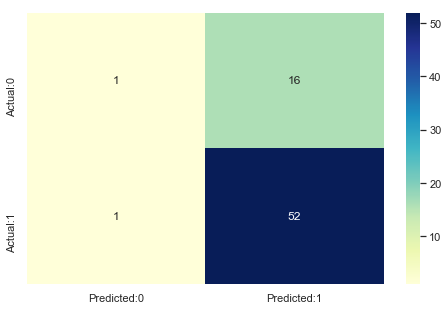

In [84]:
Perform_Logistic_Regression(X,Y)

In [82]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [80]:
def Perform_Logistic_Regression(X,Y):
    X = X.T
    Y = Y.T
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.7)
    logreg = LogisticRegression(fit_intercept=True,solver='lbfgs')
    logreg.fit(x_train,y_train[:,3])
    predicted_classes = logreg.predict(x_test)
    accuracy = accuracy_score(y_test[:,3],predicted_classes)
    f1 = f1_score(y_test[:,3],predicted_classes)
    print(logreg.coef_)
    print("Accuracy: "+str(accuracy))
    print("F1 Score: "+str(f1))
    cm = confusion_matrix(y_test[:,3],predicted_classes)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")